# Russia-Ukraine Crisis: A Data-Driven Overview

## Authors: Sushanth Sreenivasa Babu, Divya Tantri, Adit Rathi

The Ukrainian-Russian War dataset is being used by our team. The dataset includes Equipment Losses, Death Toll, Military Wounded, and Russian Prisoners of War.
A considerable number of civilians, including children, had already been slaughtered by the Russian troops. Ukraine is engulfed in flames and missiles are being fired at it. This database is updated on a weekly basis.

The dataset name is: 2022 Ukraine Russia War
We obtained this dataset from kaggle.
* Link: https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war?select=russia_losses_personnel.csv
* The license of this dataset is CC BY-NC-SA 4.0
* The user using this data is allowed to **Share** — copy and redistribute the material in any medium or format **Adapt** — remix, transform, and build upon the material
* The russia_losses_equipment.csv file: 3.11 kB
* The russia_losses_personnel.csv file: 1.53 kB

We also looked at a Twitter dataset containing tweets on the ongoing war. We found this amazing dataset on Kaggle. https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-million-rows This collection comprises daily Twitter datasets relating to the ongoing war between Ukraine and Russia. The data includes whether or not a tweet was retweeted and people's opinions on the Russia-Ukraine conflict. It can also help us collect information from reliable or government sources. For this dataset, we've included two visualizations that show the top languages used in tweets and the top areas where the Russia-Ukraine conflict is most discussed on Twitter.

Sushanth, a team member, collaborated with Divya on the core visualization, where he assisted with the implementation of bespoke panel functionality. He also worked mostly on the bqplot dashboard and preparing the data for the dashboard. The crew looked into a variety of packages, ran into roadblocks, and eventually got things to work. Adit taught him about data cleansing, while Divya taught him about matplotlib characteristics.

In [1]:
# Importing the required 
import numpy as np
import pandas as pd
import datetime
import bqplot.pyplot
import ipywidgets as ipy
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc
import squarify

# Section 1: Equipment and Personnel Losses

Russia may have lost 25% of its original assault force in four weeks of warfare. These losses are not on the magnitude of World War II, but they are significant when compared to the Russian military's current strength. Although reinforcements and replacements can help to offset some of these losses, the loss of trained personnel will impede military operations and have a political impact. The dashboard indicates how losses have mount up on the Russian side as the war proceeded. This dashboard lets the user segregate the russian losses equipment wise as well as stats on loss of personell. 

In [2]:
df = pd.read_csv("russia_losses_equipment.csv") # Equipment data
df1 = pd.read_csv("russia_losses_personnel.csv") # Personnel data

eq = df[[ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system']] # Equipments

df["Total"] = eq.sum(axis=1) # Total Equipment loss

# Merging the datasets into one dataframe
df['personnel'] = df1['personnel']
df['POW'] = df1['POW']


# Per day losses
df['personnel loss per day'] = df['personnel'].diff() 
df['equipment loss per day'] = df['Total'].diff()
df.loc[(df['personnel loss per day'].isnull()),
       'personnel loss per day'] = df.loc[(df['personnel loss per day'].isnull()), 'personnel']
df.loc[(df['equipment loss per day'].isnull()), 
       'equipment loss per day'] = df.loc[(df['equipment loss per day'].isnull()), 'Total']

# day of the week
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].apply(lambda x: x.strftime('%A'))
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,Total,personnel,POW,personnel loss per day,equipment loss per day,day_of_week
0,2022-02-25,2,10,7,80,516,49,4,100,60,...,2,0,NaN,NaN,828.0,2800,0,2800.0,828.0,Friday
1,2022-02-26,3,27,26,146,706,49,4,130,60,...,2,0,NaN,NaN,1152.0,4300,0,1500.0,324.0,Saturday
2,2022-02-27,4,27,26,150,706,50,4,130,60,...,2,0,NaN,NaN,1157.0,4500,0,200.0,5.0,Sunday
3,2022-02-28,5,29,29,150,816,74,21,291,60,...,2,5,NaN,NaN,1480.0,5300,0,800.0,323.0,Monday
4,2022-03-01,6,29,29,198,846,77,24,305,60,...,2,7,NaN,NaN,1580.0,5710,200,410.0,100.0,Tuesday


Let's visualize the data and see the our initial trends and patterns

In [3]:
columns = [ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'] # Equipment Columns

After doing some trials, we figured out that the 'APC', 'military auto', 'tank', and 'field artillery' equipments have the most losses and have a stark difference between the other equipment losses. We decided to plot these equipments separately so that we can analyze better. 

In [4]:
req = ['APC', 'military auto', 'tank', 'field artillery'] # Equipment with most losses

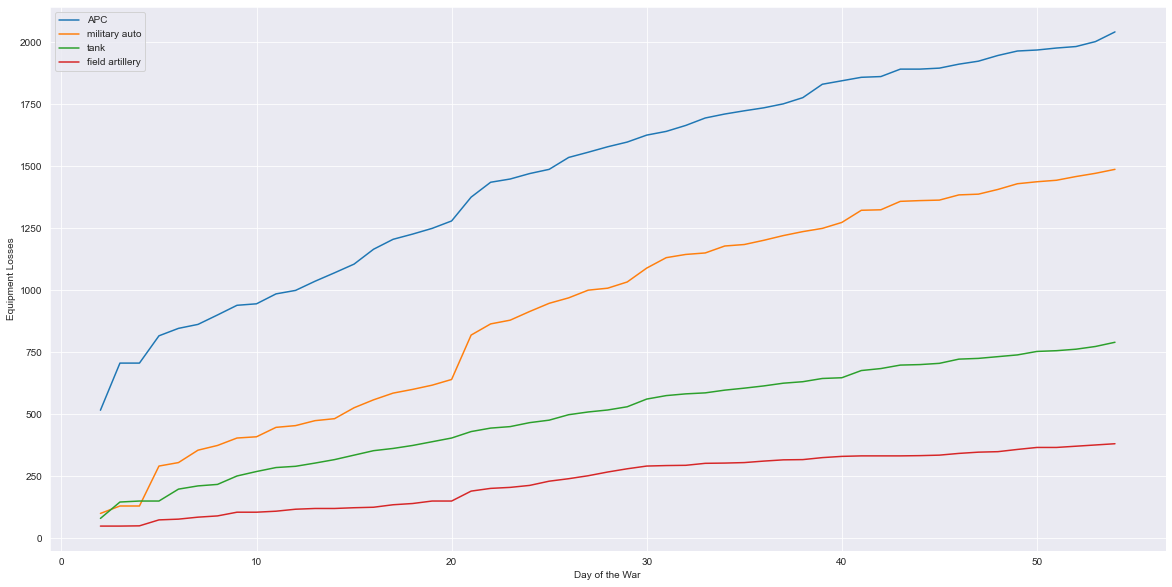

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize = (20,10))

for column in req:
    sns.lineplot(y=column, x='day', data=df)
plt.legend(labels=req)
plt.ylabel("Equipment Losses")
plt.xlabel("Day of the War")
plt.show()

We can see that the loses in these equipments have been steadily rising since day 1 of the war and "military auto" seemed to have a spike from day 20-22.

Now, let us look at the losses from all other equipments. We remove the equipments displayed earlier from out list and plot the trends of the remaining equipements.

In [6]:
req2 = set(columns) - set(req) # removing earlier equipments

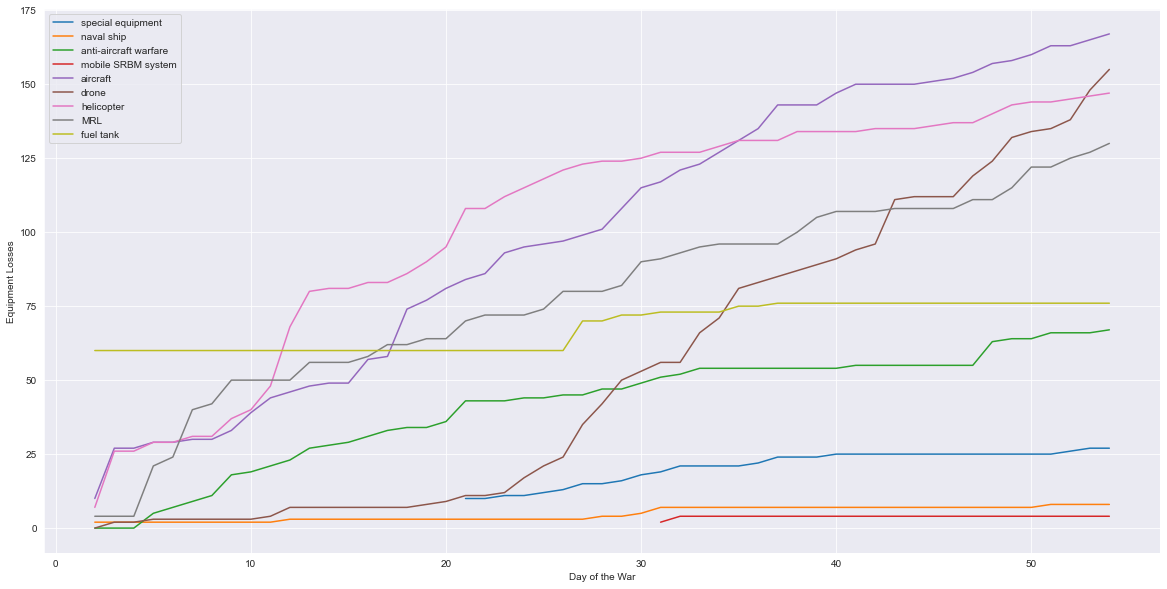

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize = (20,10))

for column in req2:
    sns.lineplot(y=column, x='day', data=df)
plt.legend(labels=req2)
plt.ylabel("Equipment Losses")
plt.xlabel("Day of the War")
plt.show()

We tried to plot the correlation between the various equipment losses and its very evident that the losses increase with the number of days as these losses are cummulative.

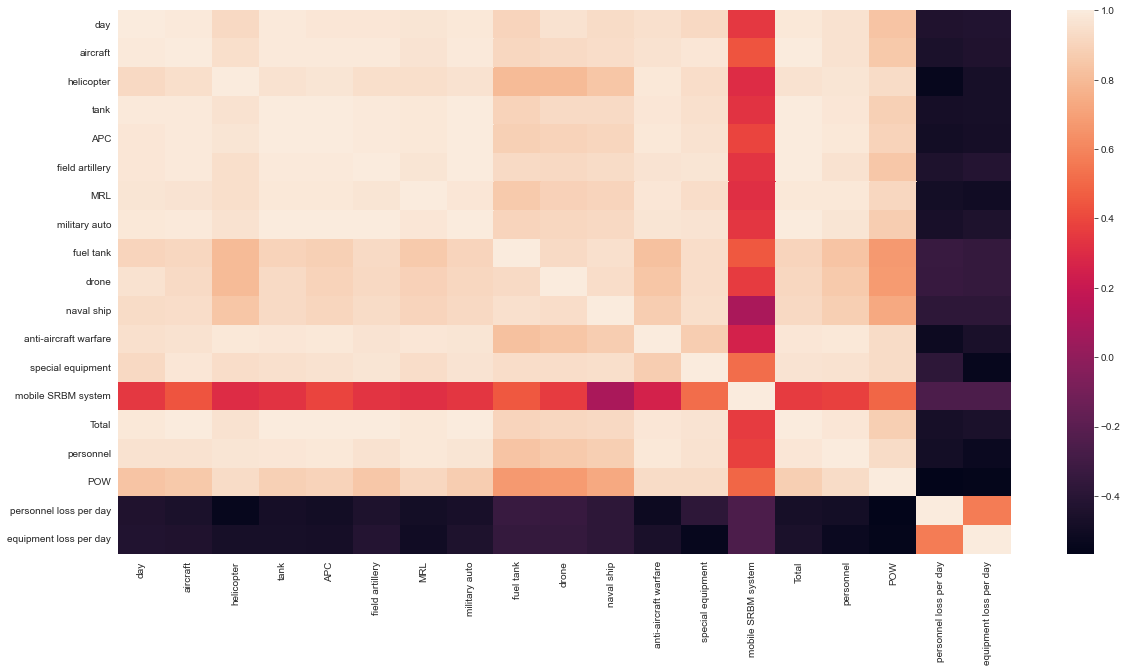

In [8]:
sns.set_style("darkgrid")

plt.figure(figsize = (20,10))
sns.heatmap(df.corr())
plt.show()

Now, we look to compare the personnel losses verus the prisioners of war. Looking that the plot, we can see that the prisoners of war is dwarfed by the personnel losses. It would be better to look at the prisoners of war in a separate visualization.

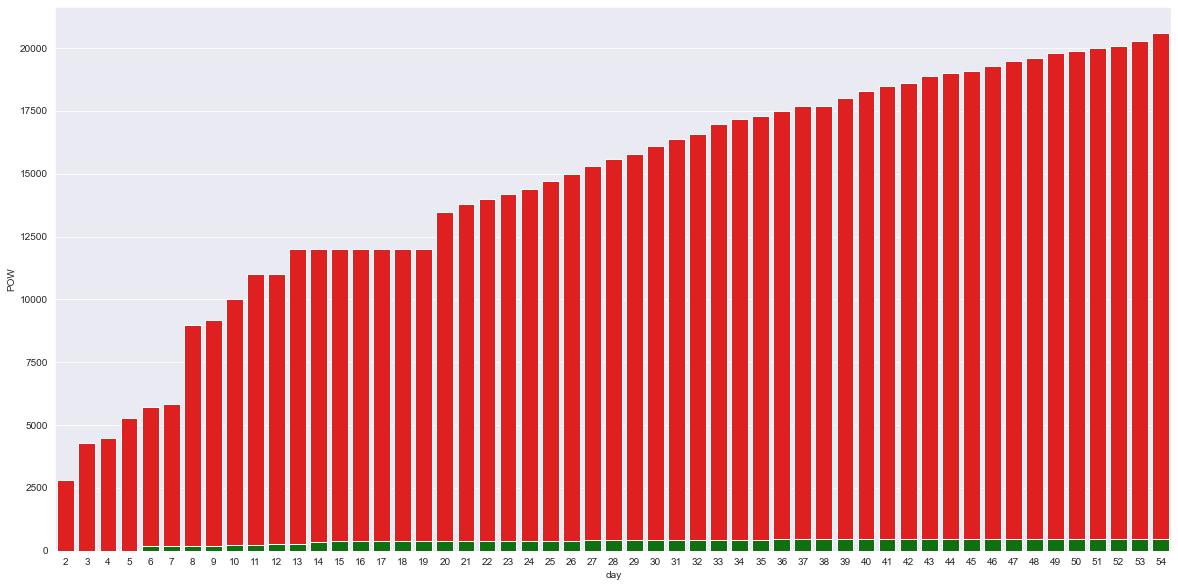

In [9]:
plt.figure(figsize = (20,10))
sns.barplot(y='personnel', x='day', data=df, color='red')
sns.barplot(y='POW', x='day', data=df, color='green')
plt.show()

We see the trends in the cummulative prisoners of war which stay stagnant for a couple of days and then increases which should be a concerning statistic. 

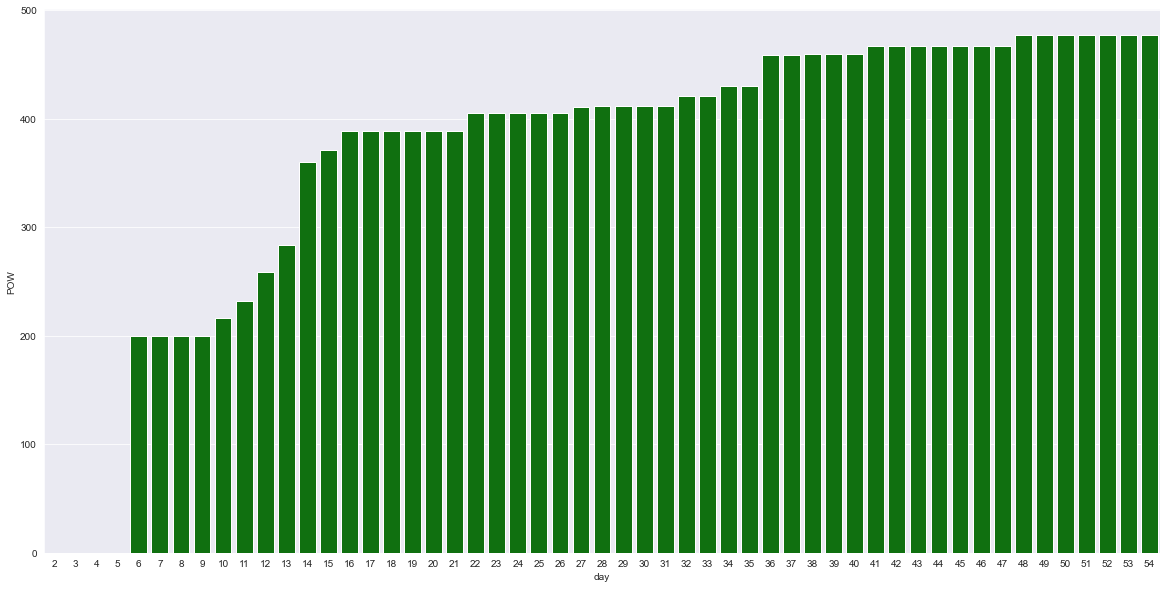

In [10]:
plt.figure(figsize = (20,10))
sns.barplot(y='POW', x='day', data=df, color='green')
plt.show()

For the below interactive plot we have included here has 3 drop downs to include interactivity.

#### Dropdown 1: 
Total equipment loss, each individual equipment type loss

#### Dropdown 2: 
Personnel and POW options

#### Dropdown 3: 
Personnel loss and equipment loss

The three plots included in this visualization have:

#### Plot 1: 
This plot has a bar chart that shows the loss of equipment in the Ukraine-Russia war vs the days of the war. This is controlled. The x axis shows the days of the war. The y axis shows the loss of equipment. 

#### Plot 2: 
The second plot shows the Prisioner of War and personnel taken over the days of war. This includes a drop down to switch between POW and personnel. The x axis shows the day of the war. The y axis shows either POW or Personnel based on the dropdown.

#### Plot 3:
The third plot shows the equipment loss per day and the personnel loss per day in the form of a histogram. There is a dropdown to switch between the two. The x axis shows the equipment loss per day or the personnel loss per day based on the drop down selection. The y axis shows the count of loss.


#### Findings:

A user can can change the drop downs and understand how damage has cummlatively added up and is continuously increasing. 

A small drop in the day to day change in personnel loss might indicate that the war might have taken a step back. This is also evident from the total loss curve.

In [11]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl

def create_figure(plot1_f1,plot1_f2, plot2_f,plot3_f):
    
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=False, figsize=(10, 8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) ## Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums
        
        # First Graph - day vs total equipment
        
        ax1.bar(df[plot1_f1], df[plot1_f2],color = 'darkorange')

        ax1.set_xlabel(plot1_f1)
        ax1.set_ylabel(plot1_f2+" Loss")
        ax1.set_title(plot1_f1+" vs "+plot1_f2+" Loss")

        # Second Graph - day vs personnel loss
    
        ax2.plot(df[plot1_f1], df[plot2_f],color='red')
        ax2.legend(labels=[plot2_f])

        ax2.set_xlabel(plot1_f1)
        ax2.set_ylabel(plot2_f)
        ax2.set_title(plot1_f1+" vs "+plot2_f)

        # Third Graph - Histogram
        
        ax3.hist(df[plot3_f],color='skyblue')
    
        ax3.set_xlabel(plot3_f)
        ax3.set_ylabel("Count")
        ax3.set_title("Histogram of "+ plot3_f)
        
        plt.close(fig)
        return fig

Column
    [0] Row(align='center')
        [0] TextInput(name='plot1_f1', value='day')
        [1] Select(name='plot1_f2', options=['Total', 'aircraft', ...], value='Total')
    [1] Row(align='center')
        [0] Select(name='plot2_f', options=['personnel', 'POW'], value='personnel')
        [1] Select(name='plot3_f', options=['personnel loss per day',...], value='personnel loss per day')
    [2] Row
        [0] Matplotlib(Figure, name='interactive00101')
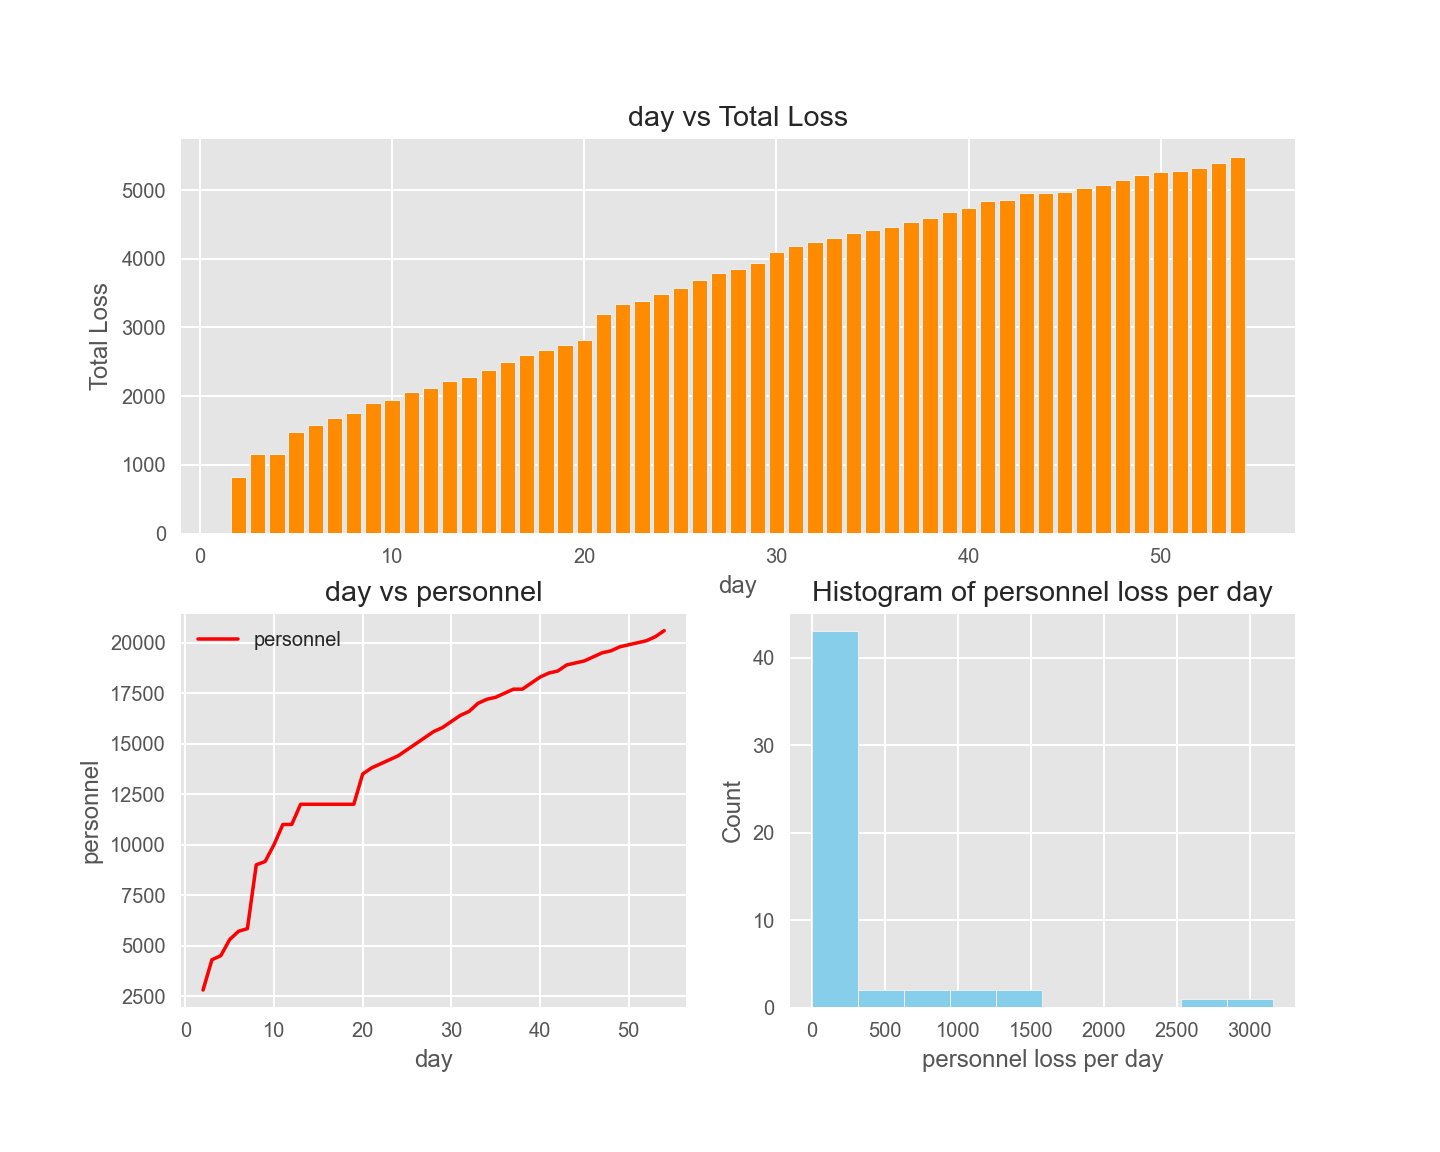

In [12]:
import panel as pn
pn.extension()

kw = dict(plot1_f1="day",
          plot1_f2=[ 'Total','aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'],
          plot2_f=['personnel', 'POW'],
          plot3_f=['personnel loss per day', 'equipment loss per day'])

dash1 = pn.interact(create_figure, **kw)

dash1 = pn.Column(
                    pn.Row(dash1[0][0],dash1[0][1], align="center"),
                    pn.Row(dash1[0][2],dash1[0][3], align="center"),
                    dash1[1]
                 )
dash1

We now prep the data to looks at losses per day and the day of the week. We created our bqplot interactivity by using the day and day of the week and creating a heatmap of the per day equipment losses. Using this, we made the heatmap interactive and it drills down into type of equipment losses and personnel vs equipment losses.

In [13]:
# Preping data for the heatmap
df_heat = df.groupby(['day_of_week', 'day'])['equipment loss per day'].sum()
df_heat = df_heat.unstack(level=0).round(2)
df_heat.fillna(0, inplace=True)
df_heat.head()

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
day,,,,,,,
2,828.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,324.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,5.0,0.0,0.0,0.0
5,0.0,323.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,100.0,0.0


In [14]:
#bar_plot - Cummulative Equipment Loss vs Equipment Type

x_scs = bqplot.OrdinalScale()
y_scs = bqplot.LinearScale() 


x_axs = bqplot.Axis(label='Equipment Type', scale=x_scs, tick_rotate=45)
y_axs = bqplot.Axis(label='Cummulative Equipment Loss', scale=y_scs, 
                   orientation = 'vertical')


barpl = bqplot.pyplot.bar(x = [], 
                         y = [],
                         scales={'x':x_scs, 'y':y_scs})

fig_barpl = bqplot.Figure(marks=[barpl], axes=[x_axs,y_axs])
fig_barpl.layout.width='100%'

In [15]:
#bar_plot - Cummulative Personnel Loss and Equipment Loss (Additional Plot for Group Submission)

x_scs = bqplot.OrdinalScale()
y_scs = bqplot.LinearScale() 


x_axs = bqplot.Axis(scale=x_scs)
y_axs = bqplot.Axis(label='Cummulative Personnel Loss and Equipment Loss', scale=y_scs, 
                   orientation = 'vertical')


barpl2 = bqplot.pyplot.bar(x = [], 
                         y = [],
                         scales={'x':x_scs, 'y':y_scs}, colors = 'green')

fig_barpl2 = bqplot.Figure(marks=[barpl2], axes=[x_axs,y_axs])
fig_barpl2.layout.width='100%'

In [16]:
#Heatmap - day vs day of the week vs total equipment loss

# barplot data manipulations
def barp(a,b):
    df_ = df[(df['day_of_week'] == b) & (df['day'] == a)]
    df_ = df_[['aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 
                   'MRL', 'military auto', 'fuel tank', 'drone',
                   'naval ship', 'anti-aircraft warfare', 'special equipment',
                   'mobile SRBM system']].copy()
    return df_

def barp2(a, b):
    df_ = df[(df['day_of_week'] == b) & (df['day'] == a)]
    df_ = df_[["personnel", "Total"]].copy()
    return df_

col_sc = bqplot.ColorScale(scheme="Red", 
                           min=np.nanmin(df_heat), 
                           max=np.nanmax(df_heat))
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Day of Week')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Day')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = df_heat.values,
                              row = df_heat.index, column = df_heat.columns,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - label
mySelectedLabel = ipy.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = df_heat.values[i,j] # grab data value
        mySelectedLabel.value = 'Equipment Loss = ' + str(v) 
        g = barp(df_heat.index[i], df_heat.columns[j])
        k = barp2(df_heat.index[i], df_heat.columns[j])
        barpl.x = ['aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 
                   'MRL', 'military auto', 'fuel tank', 'drone',
                   'naval ship', 'anti-aircraft warfare', 'special equipment',
                   'mobile SRBM system']
        barpl.y = g.values
        barpl2.x = ["personnel", "Total Equipment Loss"]
        barpl2.y = k.values
        
        
# make sure we check out     
heat_map.observe(get_data_value, 'selected')

# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig.layout.width='100%'
# fig_barpl.layout.min_width = '800px'

myDashboard1 = ipy.VBox([fig, fig_barpl, fig_barpl2])
myDashboard = ipy.VBox([mySelectedLabel, myDashboard1])

myDashboard # display the dashboard             

### Findings: 

The cummulative losses are starting to stagnate for both personnel and equipments, the most equipment losses are in the APC category followed by military auto. This dashboard helps use see which day of the week the losses are more and drills down into other loss categories.

# Section 2: Twitter Data

Under this section, we have gone ahead and used the twitter dataset to come up with contextual visualizations

#### Code used for Data Cleaning 

We cleaned the code using the following program but have commented it out because of github size limitations on the data. We have uploaded the clean version on github which we load and make further analysis.

In [17]:
# csv_collection = []
# for dirname, _, filenames in os.walk('war_tweets'):
#     for filename in filenames:
#         fullpath= os.path.join(dirname, filename)
#         csv_collection.append(fullpath)
     

In [18]:
# df = pd.read_csv(csv_collection.pop(),compression = 'gzip', index_col=0)
# for data in csv_collection:
#     try:
#         tmp = pd.read_csv(data, compression = 'gzip', index_col=0)
#     except:
#             tmp = pd.read_csv(data, index_col = 0)
#             df = pd.concat([df, tmp], axis=0)

<!-- df.drop("acctdesc", axis=1, inplace=True)
df.drop("text", axis=1, inplace=True)
df.drop("hashtags", axis=1, inplace=True) -->

In [19]:
df2 = pd.read_csv("tweets_clean_data_test.csv") # Clean data

In [20]:
df2.head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,retweetcount,language
0,1.400000e+18,RealBitstarz,"Phoenix, AZ",169,16,1573,08:12.0,1.510000e+18,0,en
1,2.722503e+09,vubblePOP,Everywhere,2176,3176,62609,38:54.0,1.510000e+18,0,en
2,1.283664e+08,am_queretaro,"Querétaro, México.",287,179968,231246,46:52.0,1.510000e+18,0,es
3,1.440000e+18,wtxnewsusa,New York,44,140,3470,33:25.0,1.510000e+18,0,en
4,1.250000e+18,Jclami1,NaN,290,19,2957,10:56.0,1.510000e+18,164,es


In [21]:
# Cleaning the location column
counts = df2.groupby(['location']).count().reset_index().sort_values(['userid'], ascending=False)
counts = counts[['location', 'userid']]

# Cleaning duplicates
counts.loc[counts['location'] == 'United States', 'location'] = 'USA'
counts.loc[counts['location'] == 'London, England', 'location'] = 'United Kingdom'
counts.loc[counts['location'] == 'Україна', 'location'] = 'Ukraine'
counts.loc[counts['location'] == 'London', 'location'] = 'United Kingdom'
counts.loc[counts['location'] == 'Paris, France', 'location'] = 'France'
counts.loc[counts['location'] == 'Украина', 'location'] = 'Ukraine'
counts.loc[counts['location'] == 'UK', 'location'] = 'United Kingdom'
counts.loc[counts['location'] == 'Washington, DC', 'location'] = 'USA'
counts.loc[counts['location'] == 'Berlin', 'location'] = 'Germany'
counts.loc[counts['location'] == 'Deutschland', 'location'] = 'Germany'
counts.loc[counts['location'] == 'Italia', 'location'] = 'Italy'

counts = counts.groupby(['location']).sum().reset_index().sort_values(['userid'], ascending=False)

### Most Used Languages for Tweets

Twitter is a platform used for several purposes. For sharing information, political point of views, announcements etc. It is a global platform with its users from different countries and different socio-cultural backgrounds.  Since the war broke out between the two countries, twitter has been flooded with tweets about the same. The languages most used for tweeting about this conflict are displayed below. English, German, Italian and French are the top languages that have been used in the tweets about the Russo-Ukranian war.

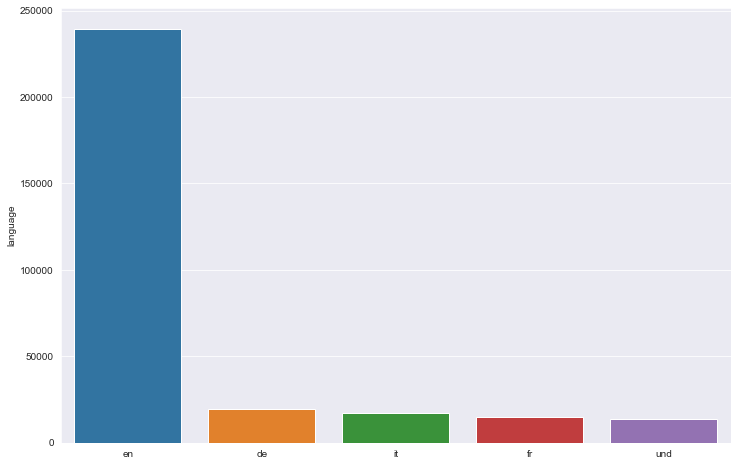

In [22]:
plt.figure(figsize = (12,8))
sns.barplot(x= df2.language.value_counts()[:5].index,y=df2.language.value_counts()[:5])
plt.show()

### Traffic Source Location

The maximum number of tweets generated about this global issue were from the victim nation of Ukraine. As the visualization depicts, around 3500 tweets were generated from Ukraine during the initial days of the war. Despite of having a major blow to the network infrastructure, Ukrainians kept the world informed about the current situation of their home. Further, USA, UK, Germany, France, Italy and India generated the most traffic of tweets on this topic.

<Figure size 864x576 with 0 Axes>

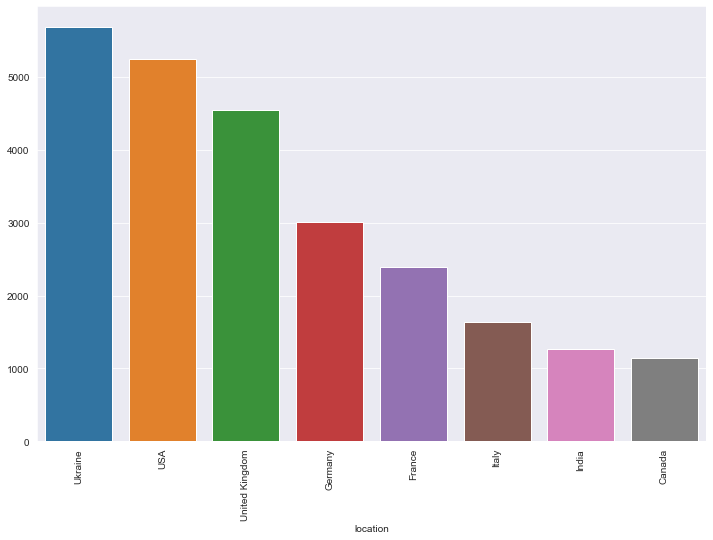

In [23]:
plt.figure(figsize = (12,8))
sizes = counts.userid[:8].values# proportions of the categories
label = counts.location[:8]
plt.figure(figsize = (12,8))
sns.barplot(x=label, y=sizes)
plt.xticks(rotation=90)
plt.show()

### Users with Most Retweets

The following scatterplot indicates the top 10 users with most retweets. It is interesting to know that the user with most retweets has been retweeted around 80,000 times. 

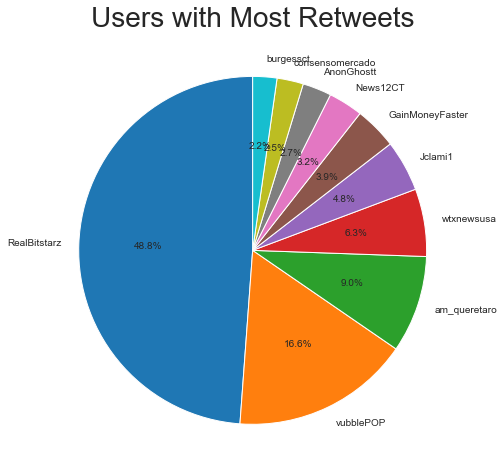

In [24]:
plt.figure(figsize = (12,8))
plt.pie(df2.retweetcount.value_counts()[:10],
        labels=df2.username[:10],
        startangle=90, autopct='%1.1f%%')
plt.title('Users with Most Retweets', fontsize=28)
plt.rcParams['font.size']=18
plt.show()

# Conclusion

Throughout the war's evolution, the losses of people and equipment were analyzed and visualized. The losses appear to be leveling off, and unfortunately, the number of prisoners of war and equipment losses continue to outnumber the number of personnel losses.

Our visualizations assist readers in comprehending the development of the war in terms of losses and the severity of each day of the war. We were also able to observe which locations are talking about the war the most, and in which languages, using the twitter data. In general, to gain a basic idea of how the conflict is progressing.

## Group Work Plan, Challenges Faced & Things We'd Improve

As per our group work plan, we decided to create a central visualization based on the equipment and personnel loss dataset. We decided to use the twiter dataset to add contextual visualizations. 
One of the major difficulties we faced was dealing with the twitter data. The dataset file consisted of multiple compressed csv files. It was an interesting challenge to figure out how to combine this in a single dataframe. Due to the magnitude of the data, the compilation time for just importing the data was almost 40 minutes. Hence, the team decided to drop unnecessary columns that reduced the size of the data set. We exported this dataset and visualized the clean data.

## REFERENCES

1. Primary dataset: This includes the equipment and personnel loss during the Ukraine-Russia war
https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war

2. This is a dataset based on tweets about the ukraine-russia crisis
https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-million-rows    